In [1]:
import numpy as np
from scipy import misc, special, stats
import matplotlib as mlp
import matplotlib.pyplot as plt
mlp.style.use('classic')

%matplotlib inline

$$\mathrm{pmf} = \frac{\lambda^k e^{-\lambda}}{k!}$$

### Check out Poisson distributions with different means first

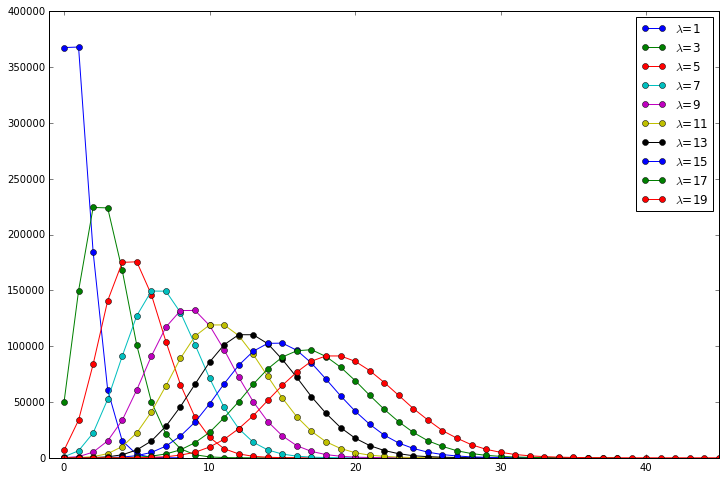

In [2]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

num = int(1e6)
mus = range(1, 20, 2)
for mu in mus:
    data = np.random.poisson(lam=mu, size=num)
    bincount = np.bincount(data)
    ax.plot(bincount, 'o-', label='$\lambda$={0}'.format(mu))
ax.set_xlim(-1, 45)
ax.legend()

### Compare Poisson to normal distribution

2,6,10,14,18,22,26,30,34,

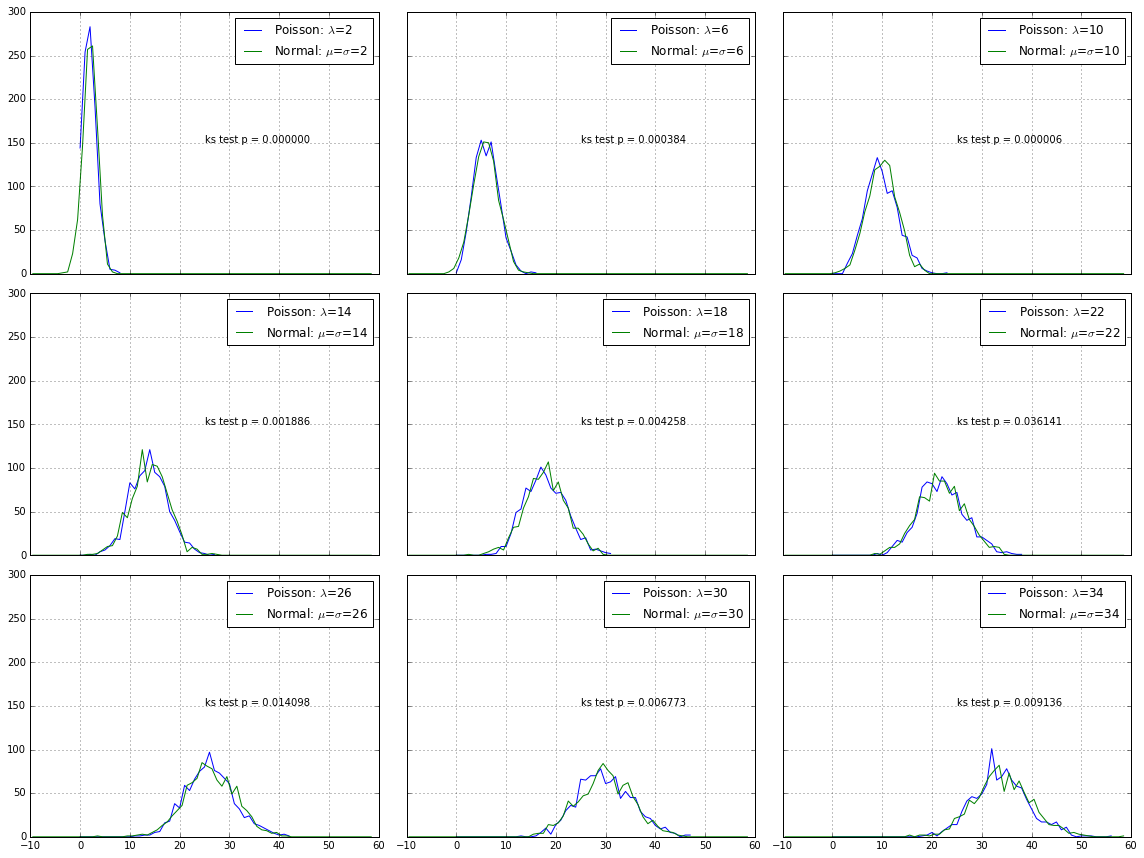

In [3]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(16, 12))
axes = axes.ravel()

num = int(1000)
mus = [ 2,  6, 10, 14, 18, 22, 26, 30, 34]

xlim = [-10, 60]
for k, mu in enumerate(mus):
    print(mu, end=',')
    ax = axes[k]
    
    poisson_data = np.random.poisson(lam=mu, size=num)
    bincount = np.bincount(poisson_data)
    ax.plot(bincount, label='Poisson: $\lambda$={0}'.format(mu))
    
    # scale should be the standard deviation while mu is the variance, so sqrt it
    normal_data = np.random.normal(loc=mu, scale=np.sqrt(mu), size=num)
    # the interval has to be 1 in order to match that of Poisson's bin count
    bins = np.arange(*xlim, 1)
    hist, bins = np.histogram(normal_data, bins=bins, density=False)
    bins = (bins[:-1] + bins[1:]) / 2
    ax.plot(bins, hist, label="Normal: $\mu$=$\sigma$={0}".format(mu))

    # ks-test shows close-to-0 pval, probably because poisson data is discrete, 
    # need to understand how ks-test takes such information into consideration
    # It depends on the sample size, too
    # https://stats.stackexchange.com/questions/32405/how-is-poisson-distribution-different-to-normal-distribution
    _, pval = stats.ks_2samp(poisson_data, normal_data)
    ax.text(0.5, 0.5, 'ks test p = {0:5f}'.format(pval), transform=ax.transAxes)

    ax.set_xlim(xlim)
    ax.legend()
    ax.grid()
plt.tight_layout()

2,6,10,14,18,22,26,30,34,

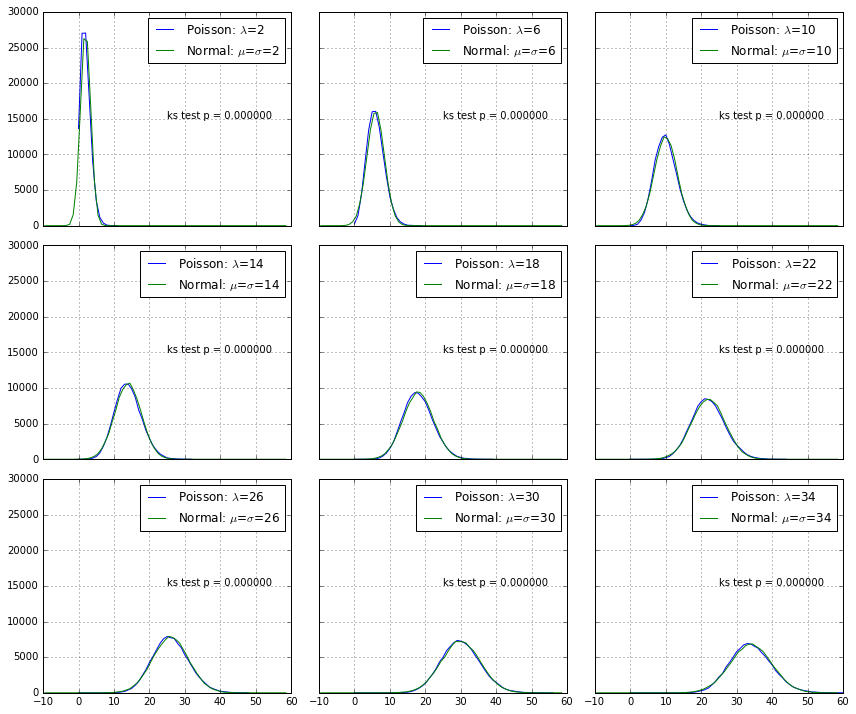

In [4]:
fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(12, 10))
axes = axes.ravel()

num = int(1e5)
mus = [ 2,  6, 10, 14, 18, 22, 26, 30, 34]

xlim = [-10, 60]
for k, mu in enumerate(mus):
    print(mu, end=',')
    ax = axes[k]
    
    poisson_data = np.random.poisson(lam=mu, size=num)
    bincount = np.bincount(poisson_data)
    ax.plot(bincount, label='Poisson: $\lambda$={0}'.format(mu))
    
    # scale should be the standard deviation while mu is the variance, so sqrt it
    normal_data = np.random.normal(loc=mu, scale=np.sqrt(mu), size=num)
    # the interval has to be 1 in order to match that of Poisson's bin count
    bins = np.arange(*xlim, 1)
    hist, bins = np.histogram(normal_data, bins=bins, density=False)
    bins = (bins[:-1] + bins[1:]) / 2
    ax.plot(bins, hist, label="Normal: $\mu$=$\sigma$={0}".format(mu))

    _, pval = stats.ks_2samp(poisson_data, normal_data)
    ax.text(0.5, 0.5, 'ks test p = {0:5f}'.format(pval), transform=ax.transAxes)

    ax.set_xlim(xlim)
    ax.legend()
    ax.grid()
plt.tight_layout()

### Highlight the shift of normal distribution

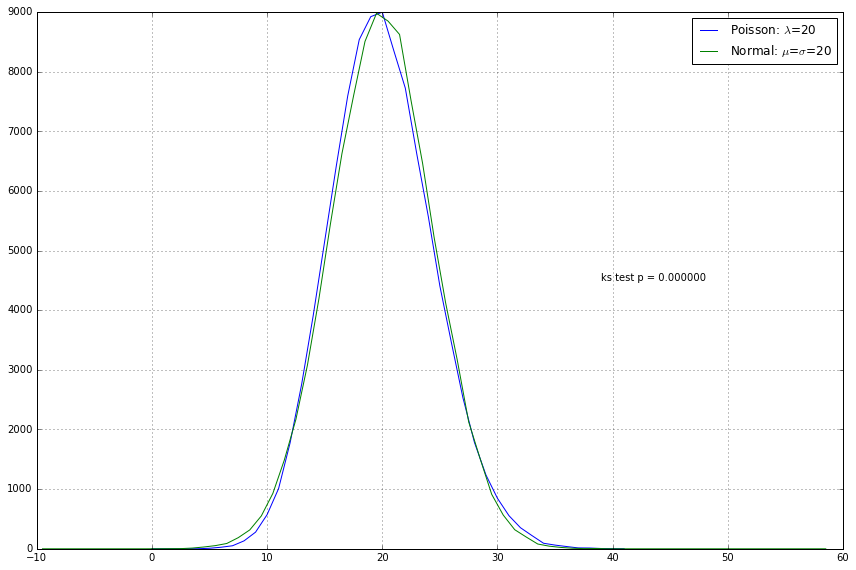

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

num = int(1e5)
mus = [20]

xlim = [-10, 60]
for k, mu in enumerate(mus):    
    poisson_data = np.random.poisson(lam=mu, size=num)
    bincount = np.bincount(poisson_data)
    ax.plot(bincount, label='Poisson: $\lambda$={0}'.format(mu))
    
    # scale should be the standard deviation while mu is the variance, so sqrt it
    normal_data = np.random.normal(loc=mu, scale=np.sqrt(mu), size=num)
    # the interval has to be 1 in order to match that of Poisson's bin count
    bins = np.arange(*xlim, 1)
    hist, bins = np.histogram(normal_data, bins=bins, density=False)
    bins = (bins[:-1] + bins[1:]) / 2
    ax.plot(bins, hist, label="Normal: $\mu$=$\sigma$={0}".format(mu))

    _, pval = stats.ks_2samp(poisson_data, normal_data)
    ax.text(0.7, 0.5, 'ks test p = {0:5f}'.format(pval), transform=ax.transAxes)

    ax.set_xlim(xlim)
    ax.legend()
    ax.grid()
plt.tight_layout()

Although Poisson and Normal distributions look similar at a glance, but there is a shift. Hence, pval is so low.
Besides, Poisson distribution is discrete and always >0.

https://stats.stackexchange.com/questions/32405/how-is-poisson-distribution-different-to-normal-distribution